In [1]:
import pandas as pd
import random
%run infectionspread.py

In [2]:
df_traveller = pd.read_csv("..\data\penetration\TUnvacc_HomeQuar_14d_traveller_breach_timeseries.csv")
df_traveller["time_left_quarantine"] = df_traveller["t_incubation"] + df_traveller["t_post_incubation"] - df_traveller["days_infectious_community"]

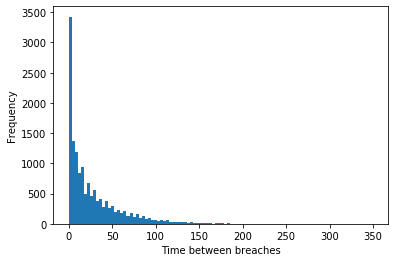

In [39]:
x=df_traveller["time_discharged"][1:].values - df_traveller["time_discharged"][0:-1].values
plt.hist(x=x, bins=100);
plt.xlabel('Time between breaches');
plt.ylabel('Frequency');

In [45]:
num_breaches = len(df_traveller)
time_period = max(df_traveller["time_discharged"])
avg_breaches = num_breaches / time_period

time_horizon = 365
breaches_over_horizon = round(avg_breaches * time_horizon)

In [87]:
breach_times = np.random.uniform(low=0, high=365, size=breaches_over_horizon)
gen_zero_times = random.choices(df_traveller["time_left_quarantine"], k=breaches_over_horizon)
ob = []

for iter in range(breaches_over_horizon):
    
    ob.append(run_outbreak(num_escaped=1, max_generations=np.inf, generation_zero_time_left_quarantine=(gen_zero_times[iter],),
                           transmission_potential_mean=2, max_time=50 ) )



In [89]:
results = {
    'finalsize': [get_finalsize(outbreak) for outbreak in ob],
    'breach_times': breach_times,
    'days_in_community': gen_zero_times
}

df = pd.DataFrame(data=results)

df["outbreak_end_time"]=df["breach_times"]+21